# Dimension reduction and features extraction


## Introduction

In machine learning and statistics, dimensionality reduction or dimension reduction is the process of reducing the number of features under consideration, and can be divided into feature selection (not adressed here) and feature extraction.

Feature extraction starts from an initial set of measured data and builds derived values (features) intended to be informative and non-redundant, facilitating the subsequent learning and generalization steps, and in some cases leading to better human interpretations. Feature extraction is related to dimensionality reduction.

The input matrix $\mathbf{X}$ of dimension $(N \times P)$ is
$$
\begin{bmatrix}
x_{11} & & \ldots   & &     x_{1P}\\
       & &    & &      \\
       & &    & &      \\
\vdots & & \mathbf{X} & & \vdots\\
       & &    & &      \\
       & &    & &      \\
x_{N1} & & \ldots    & &     x_{NP}
\end{bmatrix}
$$

Where the rows represent the samples and columns represent the variables.

The goal is to learn a transformation that extract the few relevant features. This is generally done by exploiting the covariance $\mathbf{\Sigma_{XX}}$ between the input features.

## Singular value decomposition (SVD)

### Principles
 
- SVD is a method for transforming correlated variables into a set of uncorrelated ones that better expose the various relationships among the original data items.
- At the same time, SVD is a method for identifying and ordering the dimensions along which data points exhibit the most variation.
- Singular value decomposition is the key part of principal components analysis.

### Matrix factorization

The SVD of the $(N \times P)$ matrix $\mathbf{X}$ decomposes $\mathbf{X}$ into three simple transformations
$$
\mathbf{X} = \mathbf{U}\mathbf{D}\mathbf{V}^{T}\\
\begin{bmatrix}
x_{11} & &            & & x_{1P}\\
       & &            & &      \\
       & &            & &      \\
       & & \mathbf{X} & &      \\
       & &            & &      \\
       & &            & &      \\
x_{N1} & &            & & x_{NP}
\end{bmatrix} = 
\begin{bmatrix}
u_{11} &            & u_{1K}\\
       &            &       \\
       &            &       \\
       & \mathbf{U} &       \\
       &            &       \\
       &            &       \\
u_{N1} &            & u_{NK}
\end{bmatrix}
\begin{bmatrix}
d_{1}&            & 0\\
     & \mathbf{D} &\\
 0   &            & d_{K}
\end{bmatrix}
\begin{bmatrix}
v_{11}&&              &&v_{1P}\\
      && \mathbf{V}^T &&\\
v_{K1}&&              &&v_{KP}
\end{bmatrix}.
$$

The **right-singular vectors**

- $\mathbf{V} = [\mathbf{v}_1,\cdots , \mathbf{v}_K]$ is a $P \times K$ orthogonal matrix.

- $\mathbf{V}$ perfoms the initial rotations along the $K=\min(N, P)$ **principal component directions**.

- Each $\mathbf{v}_j$ performs the linear combination of the variables that has maximum sample variance, subject to being uncorrelated with the previous $\mathbf{v}_{j-1}$.

- $\mathbf{V}$ is an orthogonal matrix form an orthonormal basis for the space spanned by the row vectors of $\mathbf{X}$. They are the orthonormal eigenvectors of $\mathbf{X}^T\mathbf{X}$.

The **singular values**

- $\mathbf{D}$ is a $K \times K$ rectangular diagonal matrix made of the singular values of $\mathbf{X}$ with $d_1 \geq d_2 \geq \cdots \geq d_K \geq 0$.

- $\mathbf{D}$ scale the projection along the coordinate axes $d_1, d_2, \cdots , d_K$.

- Singular values are the square roots of the eigenvalues of $\mathbf{X}^{T}\mathbf{X}$.

The **left-singular vectors** 

- $\mathbf{U} = [\mathbf{u}_1, \cdots , \mathbf{u}_K]$ is an $N \times K$ orthogonal matrix.

- It may be understood as the coordinates on the new orthogonal basis (obtained after the initial rotation) called **principal components** in the PCA. 

- $\mathbf{U}$ form an orthonormal basis for the space spanned by the column vectors of $\mathbf{X}$.

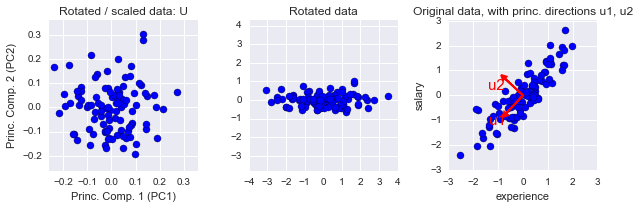

In [10]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

np.random.seed(42)
 
# dataset
n_samples = 100
experience = np.random.normal(size=n_samples)
salary = 1500 + experience + np.random.normal(size=n_samples, scale=.5)
X = np.column_stack([experience, salary])

# PCA using SVD
X -= X.mean(axis=0)  # Centering is required
U, s, Vh = scipy.linalg.svd(X, full_matrices=False)
# U : Unitary matrix having left singular vectors as columns.
#     Of shape (n_samples,n_samples) or (n_samples,n_comps), depending on
#     full_matrices.
#
# s : The singular values, sorted in non-increasing order. Of shape (n_comps,), 
#     with n_comps = min(n_samples, n_features).
#
# Vh: Unitary matrix having right singular vectors as rows. 
#     Of shape (n_features, n_features) or (n_comps, n_features) depending 
# on full_matrices.


plt.figure(figsize=(9, 3)) 

plt.subplot(131)
assert np.allclose(Xproj / s,  U)
plt.scatter(U[:, 0], U[:, 1], s=50)
plt.axis('equal')
plt.title("Rotated / scaled data: U")
plt.xlabel("Princ. Comp. 1 (PC1)")
plt.ylabel("Princ. Comp. 2 (PC2)")

plt.subplot(132)
plt.scatter(Xproj[:, 0], Xproj[:, 1], s=50)
plt.axis('equal')
plt.title("Rotated data")

plt.subplot(133)
plt.scatter(X[:, 0], X[:, 1], s=50)
for i in range(Vh.shape[0]):
    plt.arrow(x=0, y=0, dx=Vh[i, 0], dy=Vh[i, 1], head_width=0.2, 
              head_length=0.2, linewidth=2, fc='r', ec='r')
    plt.text(Vh[i, 0], Vh[i, 1],'u%i' % (i+1), color="r", fontsize=15,
             horizontalalignment='right', verticalalignment='top')
plt.axis('equal')
plt.ylim(-4, 4)

plt.title("Original data, with princ. directions u1, u2")
plt.xlabel("experience")
plt.ylabel("salary")
           
plt.tight_layout()

## Principal components analysis (PCA)

Sources:

- C. M. Bishop *Pattern Recognition and Machine Learning*, Springer, 2006

- [Everything you did and didn't know about PCA](http://alexhwilliams.info/itsneuronalblog/2016/03/27/pca/)

- [Principal Component Analysis in 3 Simple Steps](http://sebastianraschka.com/Articles/2015_pca_in_3_steps.html)


### Principles

- Principal components analysis is the main method used for linear dimension reduction.

- The idea of principal component analysis is to find the $K$ **principal components directions** (called the **loadings**) $\mathbf{V}_{K\times P}$ that capture the variation in the data as much as possible.

- Convert a set of $N$ $P$-dimensionnal observations $\mathbf{N}_{N\times P}$ of possibly correlated variables into a set of values of into a set of $N$ $K$-dimensionnal samples  $\mathbf{C}_{N\times K}$, where the $K < P$ new variables are linearly uncorrelated. The columns of $\mathbf{C}_{N\times K}$ are called the **principal components**.

- The dimension reduction is obtained by using only $K < P$ components that exploit correlation (covariance) among original variables.

- PCA is mathematically defined as an orthogonal linear transformation $\mathbf{V}_{K\times P}$ that transforms the data to a new coordinate system such that the greatest variance by some projection of the data comes to lie on the first coordinate (called the first principal component), the second greatest variance on the second coordinate, and so on.
$$
\mathbf{C}_{N\times K} = \mathbf{X}_{N \times P} \mathbf{V}_{P \times K} 
$$

- PCA can be thought of as fitting an $P$-dimensional ellipsoid to the data, where each axis of the ellipsoid represents a principal component. If some axis of the ellipse is small, then the variance along that axis is also small, and by omitting that axis and its corresponding principal component from our representation of the dataset, we lose only a commensurately small amount of information.

- Finding the $K$-axes of the ellipse will permit project the data onto a space having dimensionality $K < P$ while maximizing the variance of the projected data.

### Dataset preprocessing

#### Centering

Consider a data matrix, $\mathbf{X}$ , with column-wise zero empirical mean (the sample mean of each column has been shifted to zero), ie. $\mathbf{X}$ is replaced by $\mathbf{X} - \mathbf{1}\bar{\mathbf{x}}^T$.

#### Standardizing

Optionally scale the columns by their standard-deviation. Optionally, standardize the columns, ie., scale them by their standard-deviation. Without standardization a variable with a strong variance will capture all the effect of the PCA. The principal direction will be aligned with this variable. Standardization will increase noise variables to the level of informative variables.

The covariance matrix of centered standardized data is the correlation matrix

### Eigen decomposition of the data covariance matrix

To begin with, consider the projection onto a one-dimensional space ($K = 1$). We can define the direction of this space using a $P$-dimensional vector $\mathbf{v}$, which for convenience (and without loss of generality) we shall choose to be a unit vector so that $\|\mathbf{v}\|_2 = 1$ (note that we are only interested in the direction defined by $\mathbf{v}_1$, not in the magnitude of $\mathbf{v}$ itself). PCA consists of two mains steps:


2. **Projection in the directions that capture the greater variance** 
Each $P$-dimensional data point $\mathbf{x}_i$ is then projected onto a scalar value $\mathbf{x}_i^T \mathbf{v}$.

$$
\mathbf{v} = \arg \max_{\|\mathbf{v}\|=1}\frac{1}{N}\sum_i \left(\mathbf{x}_i^T \mathbf{v}\right)^2
$$

Equivalently, writing this in matrix form gives

$$
\mathbf{v} = \arg \max_{\|\mathbf{v}\|=1} \frac{1}{N} \|\mathbf{X} \mathbf{v}\|^2 = \frac{1}{N} \mathbf{v}^T \mathbf{X}^T \mathbf{X} \mathbf{v} = \mathbf{v}^T\mathbf{\Sigma_{XX}}\mathbf{v}
$$

where $\mathbf{S_{XX}}$ is the estiamtion of the data covariance matrix defined by:
$$
\mathbf{S_{XX}} = \frac{1}{N-1} \mathbf{X}^T\mathbf{X}.
$$

We now maximize the projected variance $\mathbf{v}^T \mathbf{S_{XX}} \mathbf{v}$ with respect to $\mathbf{v}$. Clearly, this has to be a constrained maximization to prevent $\|\mathbf{v}_2\| \rightarrow \infty$. The appropriate constraint comes from the normalization condition $\|\mathbf{v}\| = \mathbf{v}^T \mathbf{v}= 1$. To enforce this constraint, we introduce a Lagrange multiplier that we shall denote by $\lambda$, and then make an unconstrained maximization of

$$
\mathbf{v}^T\mathbf{S_{XX}} \mathbf{v} + \lambda (1 - \mathbf{v}^T \mathbf{v}).
$$

By setting the derivative with respect $\mathbf{v}$ equal to zero, we see that this quantity will have a stationary point when
$$
\mathbf{S_{XX}} \mathbf{v} = \lambda \mathbf{v}
$$

$\mathbf{v}$ must be an eigenvector of $\mathbf{S_{XX}}$. If we left-multiply by $\mathbf{v}^T$ and make use of $\mathbf{v}^T \mathbf{v} = 1$, we see that the variance is given by
$$
\mathbf{v}^T \mathbf{S_{XX}} \mathbf{v} = \lambda
$$

and so the variance will be a maximum when we set $\mathbf{v}$ equal to the eigenvector having the largest eigenvalue $\lambda$. This eigenvector is known as the first principal component.

We can define additional principal components in an incremental fashion by choosing each new direction to be that which maximizes the projected variance amongst all possible directions orthogonal to those already considered. If we consider the general case of an $K$-dimensional projection space, the optimal linear projection for which the variance of the projected data is maximized is now defined by the $K$ eigenvectors $\mathbf{v_1}, \ldots , \mathbf{v_K}$ of the data covariance matrix $\mathbf{S_{XX}}$ corresponding to the $K$ largest eigenvalues $\lambda_1, \ldots , \lambda_K$.

#### Back to SVD

The sample covariance matrix of **centered data** $X$ is given as:
$$
\mathbf{S_{XX}} = \frac{1}{N-1}\mathbf{X}^T\mathbf{X}.
$$

If you do the Eigen decomposition of $\mathbf{X}^T\mathbf{X}$

\begin{align*}
\mathbf{X}^T\mathbf{X}
 &= (\mathbf{U}\mathbf{D}\mathbf{V}^T)^T(\mathbf{U}\mathbf{D}\mathbf{V}^T)\\
 &= \mathbf{V}\mathbf{D}^T\mathbf{U}^T\mathbf{U}\mathbf{D}\mathbf{V}^T\\
 &=\mathbf{V}\mathbf{D}^2\mathbf{V}^T
\end{align*}.

It turns out that if you have done the singular value decomposition then you already have the Eigen value decomposition for $\mathbf{X}^T\mathbf{X}$. Indeed the right singular vectors $\mathbf{U}$ of $\mathbf{X}$ are equivalent to the eigenvectors of $\mathbf{X}^T\mathbf{X}$, while the singular values $d_k$ of $\mathbf{X}$ are equal to the square roots of the eigenvalues $\lambda_k$ of $\mathbf{X}^T\mathbf{X}$. Moreover computing PCA with SVD do not require to form the matrix $\mathbf{X}^T\mathbf{X}$, so computing the SVD is now the standard way to calculate a principal components analysis from a data matrix, unless only a handful of components are required.

#### PCA outputs

The SVD or the eigen decomposition of the data covariance matrix provides three main quantities

1. **Principal component directions** or **loadings** are the **eigenvectors** of $\mathbf{X}^T\mathbf{X}$, $\mathbf{V}_{K \times P}$ or the **right-singular vectors** of an SVD of $\mathbf{X}$ are called principal component directions of $\mathbf{X}$. They are generally computed using the SVD of $\mathbf{X}$.

2. **Principal components** is the ${N\times K}$ matrix $\mathbf{C}$ which is obtained by projecting $\mathbf{X}$ onto the principal components directions
$$
\mathbf{C}_{N\times K} = \mathbf{X}_{N \times P} \mathbf{V}_{P \times K} 
$$
Since $\mathbf{X} = \mathbf{UDV}^T$ and $\mathbf{V}$ is orthogonal ($\mathbf{V}^T \mathbf{V} = \mathbf{I}$): 
\begin{align}
\mathbf{C}_{N\times K} &= \mathbf{UDV}^T_{N \times P} \mathbf{V}_{P \times K}\\ 
\mathbf{C}_{N\times K} &= \mathbf{UD}^T_{N \times K} \mathbf{I}_{K \times K}\\
\mathbf{C}_{N\times K} &= \mathbf{UD}^T_{N \times K}\\
\end{align}
Thus $\mathbf{c}_j = \mathbf{X}\mathbf{v}_j = \mathbf{u}_j d_j, j=1, \ldots K$. Hence $\mathbf{u}_j$ is simply the projection of the row vectors of $\mathbf{X}$, i.e., the input predictor vectors, on the direction $\mathbf{v}_j$, scaled by $d_j$.
$$
\mathbf{c}_1=
\begin{bmatrix}
x_{1,1}v_{1,1}+ \ldots +x_{1,P}v_{1,P}\\
x_{2,1}v_{1,1}+ \ldots +x_{2,P}v_{1,P}\\
\vdots\\
x_{N,1}v_{1,1}+ \ldots +x_{N,P}v_{1,P}
\end{bmatrix}
$$

3. The **variance** of each component is given by the eigen values $\lambda_k, k=1, \dots K$. It can be obtained from the singular values:
\begin{align}
var(\mathbf{c}_k) =& \frac{1}{N-1}(\mathbf{X} \mathbf{v}_k)^2\\
                  =& \frac{1}{N-1}(\mathbf{u}_k d_k)^2\\
                  =& \frac{1}{N-1}d_k^2
\end{align}

### Selection of the number of PCs


We mmust choose $K^* \in [1, \ldots,  K]$ the number of required components calculating the explained variance ratio of the $K^*$ first components and chosing $K^*$ such that the explained variance ratio if superior to a given threshold ($\approx 90\%$).
$$
explained~var(\mathbf{c}_k) = \frac{\sum_j^{K^*} var(\mathbf{c}_k)}{\sum_j^K var(\mathbf{c}_k)}
$$

### Interpretation and visualization

**PCs**

Plot the samples projeted on first the principal components PC1, PC2.

**PC directions**

Exploring the loadings associated with a component provides the contribution of each original variable in the component.

Remark: The loadings (PC directions) are the coefficients of multiple regression of PC on original variables:

\begin{align}
\mathbf{c}                                             & = \mathbf{X} \mathbf{v}\\
\mathbf{X}^T \mathbf{c}                                & = \mathbf{X}^T \mathbf{X} \mathbf{v}\\
(\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{c} & = \mathbf{v}
\end{align}


Another way to evaluate the contribution of original variables in each PC can be obtained by computing the correlation between the PCs and the original variable, ie. columns of $\mathbf{X}$ noted $\mathbf{x}_j, j=1, \ldots, P$. For the PC $k$, compute plot the correlations with all original variable 
$$
cor(\mathbf{c}_k, \mathbf{x}_j),  j=1 \ldots K, j=1 \ldots K, 
$$

## Example

In [11]:
import numpy as np
from sklearn.decomposition import PCA

np.random.seed(42)
 
# dataset
n_samples = 100
experience = np.random.normal(size=n_samples)
salary = 1500 + experience + np.random.normal(size=n_samples, scale=.5)
X = np.column_stack([experience, salary])

# PCA with scikit-learn
pca = PCA(n_components=2)
pca.fit(X)
print(pca.explained_variance_ratio_)

[ 0.93646607  0.06353393]


## Exercises

### 1. Write a basic PCA class

Write a class `BasicPCA` with two methods:
- `fit(X)` that estimates the data mean and principal components directions.
- `transform(X)` that project a new the data into the principal components.

Check that your `BasicPCA` pfermed simillarly than the one from sklearn.

### Apply your sklearn PCA on `iris` dataset available at: 
'https://raw.github.com/neurospin/pystatsml/master/data/iris.csv'

- Describe the data set. Should the dataset been standardized ?

- Retrieve the explained variance ratio. Determine $K$ the number of components.

- Print the $K$ principal components direction and correlation of the $K$ principal components with original variables. Interpret the contribution of original variables into the PC.

- Plot samples projected into the $K$ first PCs.

- Color samples with their species.